# Lab 8 Report: 
## FINAL PROJECT STRATEGIC PLANNING

### Lab 8 Instruction: 
https://canvas.uw.edu/files/106242897/download?download_frd=1

### Team Members: Dylan Jones and OScar Coromina Pujol

### Dataset for your project:

#### Feel free to delete or modify pre-written markdown cells below the line

---

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from meteostat import Point, Daily, Hourly, Stations
import torch
import seaborn as sns


## Understanding the Data

In [2]:

lat = 47.6
lon = -122.3

# Define start and end times
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2023, 1, 1)

data = Hourly(Point(lat,lon), start=start, end=end).fetch()

# Find how much data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149017 entries, 2006-01-01 00:00:00 to 2023-01-01 00:00:00
Freq: H
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    149017 non-null  float64
 1   dwpt    149017 non-null  float64
 2   rhum    149017 non-null  float64
 3   prcp    147983 non-null  float64
 4   snow    0 non-null       float64
 5   wdir    146331 non-null  float64
 6   wspd    149017 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    149014 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    42953 non-null   float64
dtypes: float64(11)
memory usage: 13.6 MB


In [3]:
# Extract all relevant channels and impute and missing values
data_cleaned = data[['temp', 'dwpt', 'pres', 'wdir']]
print(data_cleaned.isna().any())

# Replace NaN values with 0 for 'prcp' feature
# data_cleaned['prcp'].fillna(0, inplace=True)

# Use linear interpolation for other features
data_cleaned['temp'].interpolate(method='linear', inplace=True)
data_cleaned['dwpt'].interpolate(method='linear', inplace=True)
# data_cleaned['wspd'].interpolate(method='linear', inplace=True)
data_cleaned['wdir'].interpolate(method='linear', inplace=True)
data_cleaned['pres'].interpolate(method='linear', inplace=True)

print(data_cleaned.isna().any())


temp    False
dwpt    False
pres     True
wdir     True
dtype: bool
temp    False
dwpt    False
pres    False
wdir    False
dtype: bool


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


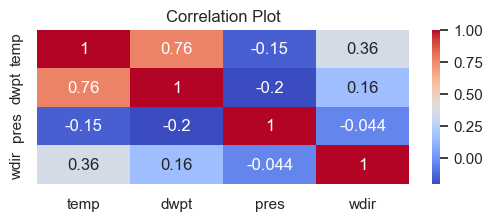

In [4]:
# Generate correlation matrix 
sns.set()
correlation_matrix = data_cleaned.corr()
# first_row = correlation_matrix.iloc[0].to_frame().T
plt.figure(figsize=(6, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [5]:
timeseries = data_cleaned.values.astype('float32')

mea=np.mean(timeseries[:,0])
sig=np.std(timeseries[:,0])

scaler = StandardScaler()

scaler.fit(timeseries)

timeseries=scaler.transform(timeseries)

#With this next line (executed) we can include time into the timeseries
#timeseries=np.squeeze(combine_arrays(timeseries,transformed_dates)).astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

num_features=timeseries.shape[1]

num_features

4

## Understanding the Task

We are trying to do prediction of a time series. The time series is weather, which can be a really useful thing to predict. We will evaluate it by plotting predicted temperature with actual temperature to evaluate how similar is it.

## Developing an initial plan for your project

We are trying to use an LSTM model to predict the time series. After some testing, we will combine a hybrid of an LSTM and a fully connected layer.